In [2]:
%load_ext autoreload
%autoreload 2

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas

from collections import defaultdict, Counter

# Exercise 3 

<img src="img/Exercise03.png" width=600>

In [181]:
x = np.array([1, 2, 4, 8])
y = np.array([3.5, 2.0, 0.15, 3.1])

In [250]:
p = np.polyfit(x, y, deg=2)
p

array([ 0.26330645, -2.43540323,  5.725     ])

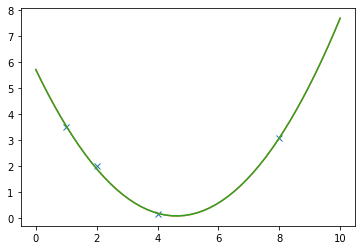

In [268]:
t = np.linspace(0, 10)
plt.plot(x,y, "x")
plt.plot(t, np.polyval(p, t))
plt.plot(t, f(*np.flip(p), t))

array([ 5.725     , -2.43540323,  0.26330645])

In [269]:
def f(a, b, c, x):
    return a + b*x + c*x**2

#f(0.2, -2.4, 5.7, 8)
f(5.7, -2.4, 0.2, 8)

-0.6999999999999993

In [275]:
def likelihood(a, b, c):
    
    def helper(p, a, b, c):
        x, y = p 
        return 1 if np.abs(f(a, b, c, x) - y) <= 0.5 else 0
   
    return np.prod([(helper(p, a, b, c)) for p in zip(x, y)])

likelihood(*np.flip(p))

1

In [288]:
def prior_params(a, b, c):
    
    p_a = 1/10 if a >= 0 and a <= 10 else 0
    p_b = 1/10 if np.abs(b) <= 5 else 0
    p_c = 1/2 if np.abs(c) <= 2 else 0
    
    return p_a * p_b * p_c

prior_params(*np.flip(p))

0.005000000000000001

In [296]:
N = 100
A = np.linspace(-10, 10, N)
B = A.copy()
C = A.copy()

L = []
for a in A:
    for b in B:
        for c in C:
            
            # calculate posterior (unnormed)
            L.append(likelihood(a, b, c) * prior_params(a, b, c))

L = np.array(L).reshape(N, N, N)



In [297]:
np.max(L)

0.005000000000000001

In [299]:
np.unravel_index(np.argmax(L), L.shape)

(78, 36, 51)

In [305]:
params_bayes = A[78], B[36], C[51] 
params_bayes

(5.757575757575758, -2.7272727272727275, 0.30303030303030276)

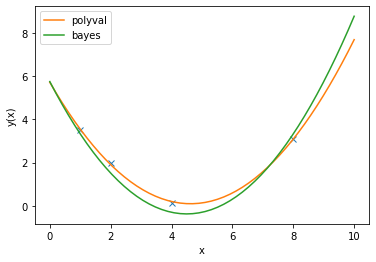

In [309]:
t = np.linspace(0, 10)
plt.plot(x,y, "x")
plt.plot(t, np.polyval(p, t), label="polyval")
plt.plot(t, f(*params_bayes, t), label="bayes")

plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
